In [113]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [114]:
from urllib.request import urlretrieve

In [115]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f9bda7cda0>)

In [116]:
!pip install pandas --quiet

In [117]:
import pandas as pd

In [118]:
medical_df = pd.read_csv('medical.csv')

In [119]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [120]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [121]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [122]:
!pip install plotly matplotlib seaborn --quiet 

In [123]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [125]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [126]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [127]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)',
                  )
fig.update_layout(bargap=0.1)
fig.show()

In [128]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show() 

In [129]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [130]:
px.histogram(medical_df,x='smoker',color='sex',title='smoker')

In [131]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [132]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [133]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [134]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [135]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [136]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [137]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [138]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [139]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


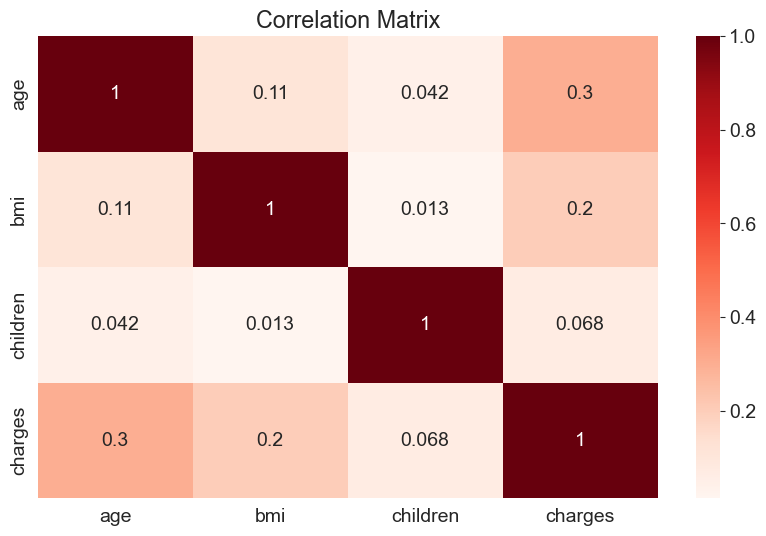

In [140]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap='Reds',annot=True)
plt.title('Correlation Matrix');
plt.show()

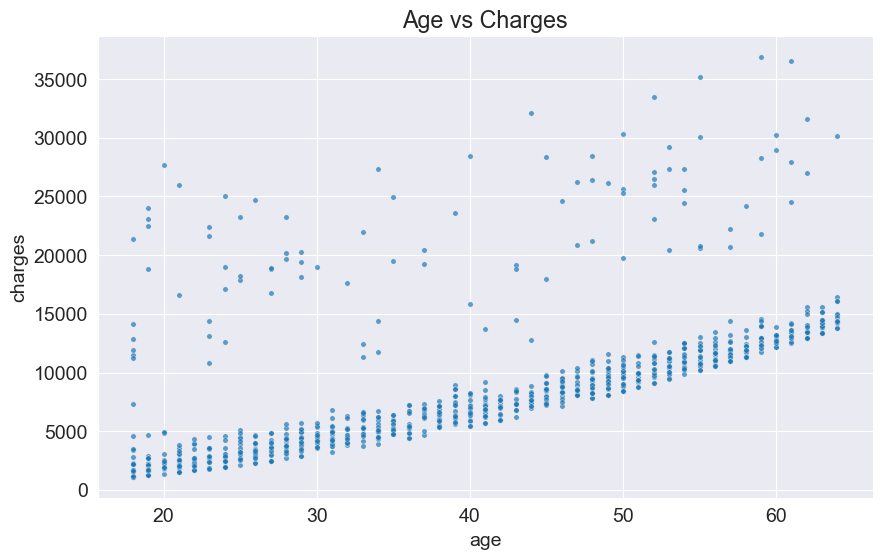

In [141]:
non_smoker_df = medical_df[medical_df.smoker=='no']
# fig = px.scatter(non_smoker_df,
#                  x='age',
#                  y='charges',
#                  opacity=0.8,
#                  title='Age vs Charges')
# fig.update_traces(marker_size=5)
# fig.show()
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15);
plt.show()

In [142]:
def estimate_charges(age,w,b):
    return w*age+b

Above cell (estimate_charges) is our first
Machine Learning Model

In [144]:
w=50
b=100

In [145]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [146]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

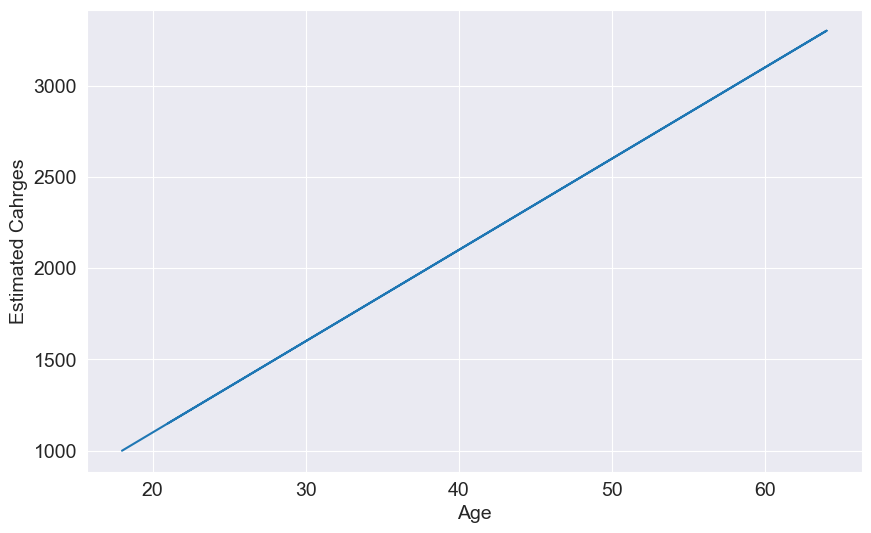

In [147]:
plt.plot(ages,estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Cahrges');
plt.show()

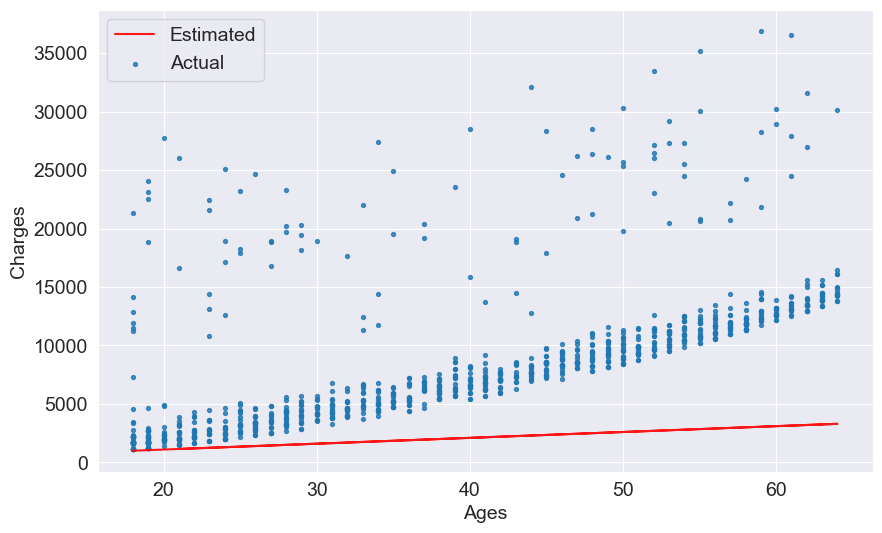

In [148]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges,alpha=0.9,color='red')
plt.scatter(ages,target,alpha=0.8,s=8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimated','Actual'])
plt.show()

In [149]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.9)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimated','Actual'])
    plt.show()

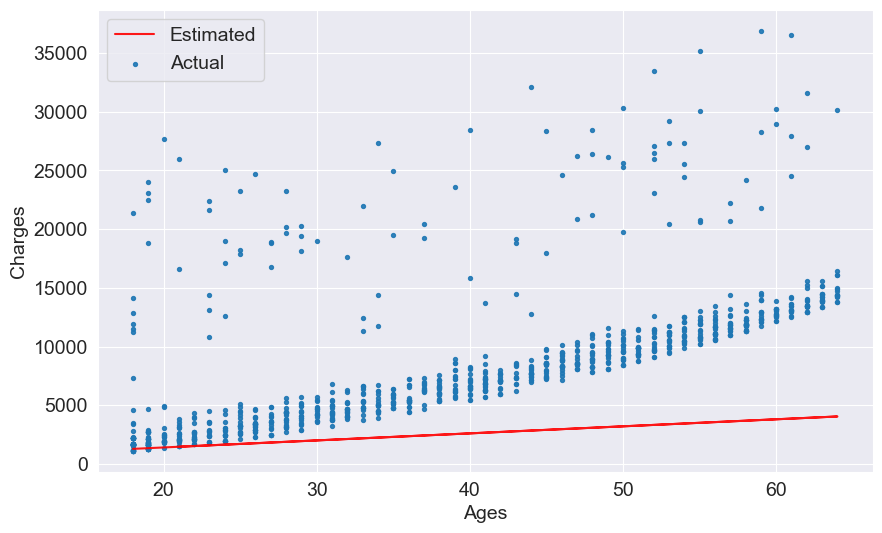

In [150]:
try_parameters(60,200)

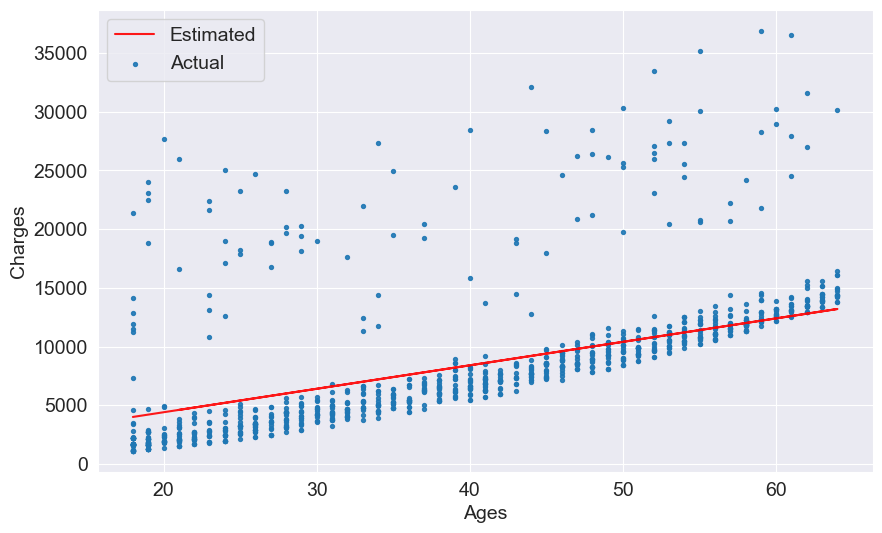

In [151]:
try_parameters(200,400)

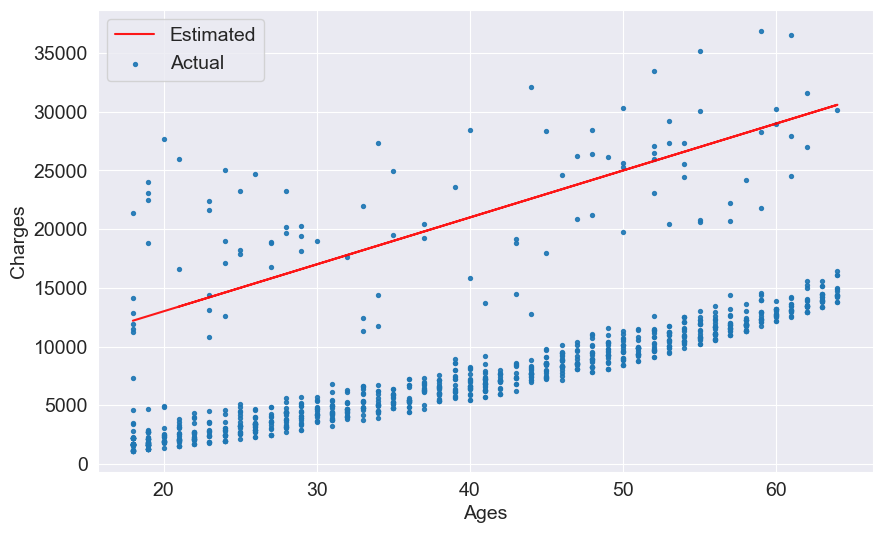

In [152]:
try_parameters(400,5000)

In [153]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [154]:
!pip install numpy --quiet

In [155]:
import numpy as np

In [156]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [157]:
w = 50
b = 100

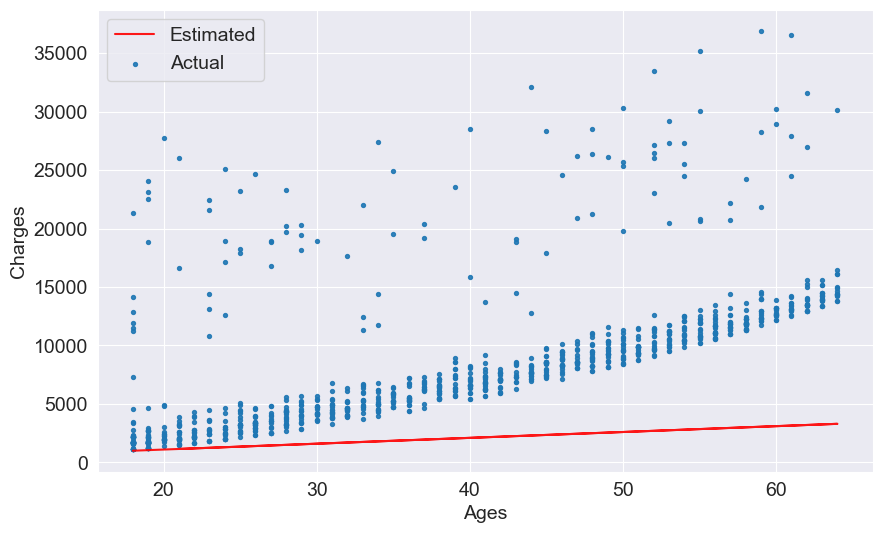

In [158]:
try_parameters(w,b)

In [159]:
targets = non_smoker_df['charges']
predicted= estimate_charges(non_smoker_df.age,w,b)

In [160]:
rmse(targets,predicted)

8461.949562575493

In [161]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.8)
    plt.scatter(ages,target,alpha=0.8,s=8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Predicted','Actual'])
    plt.title('Age vs Charges')
    plt.show();
    loss=rmse(target,predictions)
    print("Loss: ",loss)

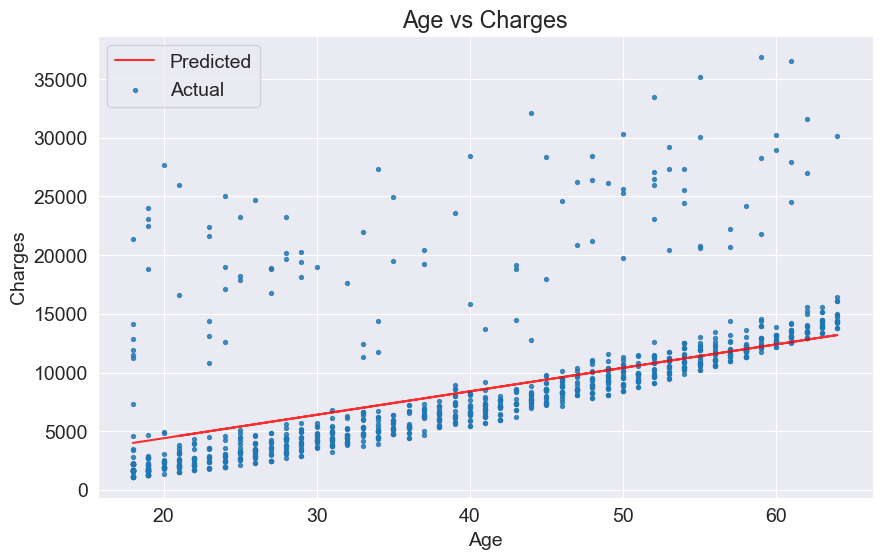

Loss:  4760.232777638082


In [162]:
try_parameters(200,400)

In [163]:
!pip install scikit-learn --quiet

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression()

In [166]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [167]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ',inputs.shape)
print('targets.shape : ',targets.shape)

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


In [168]:
model.fit(inputs,target)

LinearRegression()

In [231]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [233]:
predictions = model.predict(inputs)

In [235]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [237]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [239]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [241]:
rmse(targets,predictions)

4662.505766636395

In [243]:
model.coef_

array([267.24891283])

In [245]:
model.intercept_

-2091.4205565650827

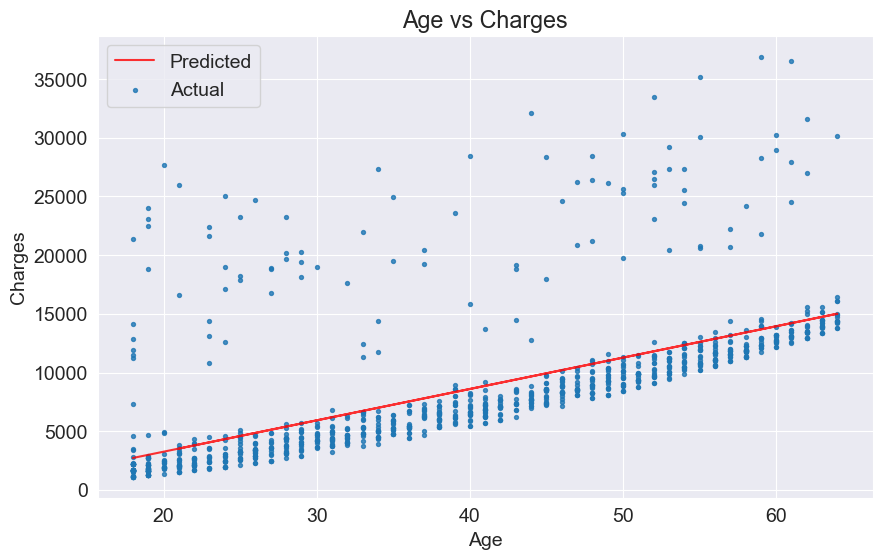

Loss:  4662.505766636395


In [247]:
try_parameters(model.coef_,model.intercept_)

In [249]:
#create inputs and targets 
inputs,targets = non_smoker_df[['age']],non_smoker_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [253]:
# Add another feature like bmi as input to compute the loss
#create inputs and targets 
inputs,targets = non_smoker_df[['age','bmi']],non_smoker_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [255]:
#Does not affect the loss much as correlation of charges with bmi is very weak
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

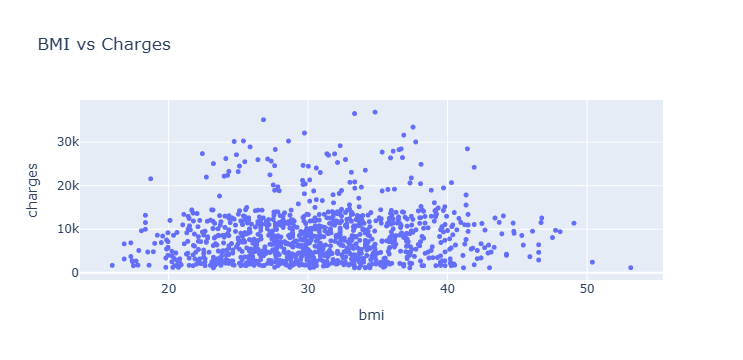

In [257]:
fig = px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [261]:
# Add another feature like children as input to compute the loss
#create inputs and targets 
inputs,targets = medical_df[['age','bmi','children']],medical_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 11355.317901125973


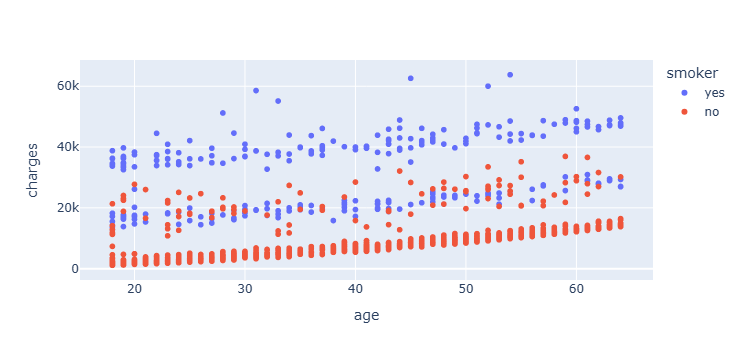

In [263]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

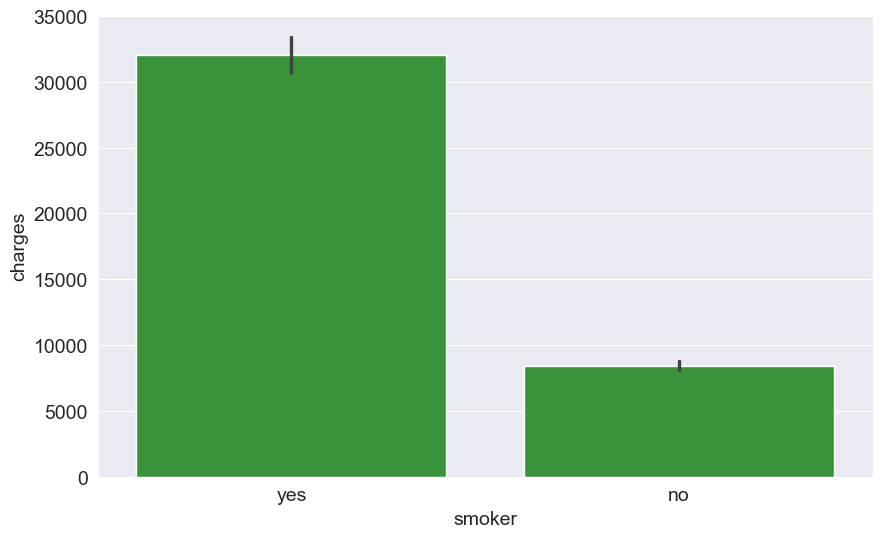

In [269]:
sns.barplot(data=medical_df,x='smoker',y='charges')
plt.show()

In [271]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [273]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [275]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [277]:
#create inputs and targets 
inputs,targets = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [287]:
sex_codes = {'female':0,'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [289]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [291]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

In [293]:
#create inputs and targets 
inputs,targets = medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [295]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [297]:
one_hot= enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [299]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [301]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [313]:
#create inputs and targets 
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs,targets = medical_df[input_cols],medical_df['charges']
# create and train model
model = LinearRegression().fit(inputs,targets)
#Generate Predictions
predictions=model.predict(inputs)

#Compute loss to evaluate model
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [315]:
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [317]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [319]:
model.intercept_

-12525.547811195462

In [323]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [325]:
from sklearn.preprocessing import StandardScaler

In [327]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [331]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [335]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [339]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [337]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [341]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data=medical_df[cat_cols].values

In [343]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = medical_df.charges
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print("Loss: ",loss)

Loss:  6041.6796511744515


In [351]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [355]:
new_customers = [[28,30,2,1,0,0,1,0,0]]
scaler.transform([[28,30,2]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [357]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])